In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('final_data.csv', index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   repo_name       1500 non-null   object
 1   star            1500 non-null   object
 2   fork            1500 non-null   object
 3   watch           1500 non-null   object
 4   issue           1500 non-null   object
 5   tags            1500 non-null   object
 6   description     1480 non-null   object
 7   contributers    1500 non-null   object
 8   license         1500 non-null   object
 9   repo_url        1500 non-null   object
 10  most_used_lang  1297 non-null   object
dtypes: object(11)
memory usage: 140.6+ KB


In [3]:
data.head()

,repo_name,star,fork,watch,issue,tags,description,contributers,license,repo_url,most_used_lang
0,keras,47.9k,18.1k,2.1k,"2,940","['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,49,View license,https://github.com/keras-team/keras,Python
1,scikit-learn,40.3k,19.6k,2.2k,"1,505","['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,108,View license,https://github.com/scikit-learn/scikit-learn,Python
2,PythonDataScienceHandbook,23.1k,9.9k,1.5k,65,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,0,View license,https://github.com/jakevdp/PythonDataScienceHa...,Jupyter Notebook
3,Probabilistic-Programming-and-Bayesian-Methods...,21k,6.6k,1.4k,127,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",0,MIT,https://github.com/CamDavidsonPilon/Probabilis...,Jupyter Notebook
4,Data-Science--Cheat-Sheet,18.4k,8.2k,1.5k,7,[],Cheat Sheets,0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...,NaN


## Cleaning

So, we can see in the info section that some of the rows in the `description` and `most_used_lang` are null. I think most used language feature affects the popularity of the repo because the projects using trending technologies is the project most viewed by people. Let's see the popularity of repositories which has no language.

In [4]:
data[data['most_used_lang'].isnull()][['star', 'fork', 'most_used_lang']].head(10)

,star,fork,most_used_lang
4,18.4k,8.2k,NaN
8,14.7k,5.3k,NaN
11,12.1k,3.4k,NaN
16,10.3k,2.5k,NaN
17,9.9k,1.8k,NaN
18,9.7k,2.1k,NaN
20,8.7k,2.1k,NaN
22,7.8k,1.1k,NaN
26,7.4k,1.5k,NaN
30,6.9k,1.7k,NaN


Above, we can see that without having any language these repositories has many `stars` and `forks`. Then these repositories must share some resources or any useful information like this [here](https://github.com/loveunk/Deep-learning-books). So, I think replacing is the best option then dropping.

In [5]:
data['most_used_lang'] = data['most_used_lang'].fillna('no language', inplace=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   repo_name       1500 non-null   object
 1   star            1500 non-null   object
 2   fork            1500 non-null   object
 3   watch           1500 non-null   object
 4   issue           1500 non-null   object
 5   tags            1500 non-null   object
 6   description     1480 non-null   object
 7   contributers    1500 non-null   object
 8   license         1500 non-null   object
 9   repo_url        1500 non-null   object
 10  most_used_lang  1500 non-null   object
dtypes: object(11)
memory usage: 140.6+ KB


We can see that there is rows which has no any `description`. We know having description of repo makes it more attractive or easy for other's to understand the project. It will affects the popularity somehow.

In [6]:
print(data[data['description'].isnull()][['most_used_lang', 'repo_url', 'star']])

     most_used_lang                                           repo_url   star
202             C++  https://github.com/oreillymedia/Learning-OpenC...   1.4k
214          Python  https://github.com/MicrocontrollersAndMore/Ope...    405
219            Java                   https://github.com/xikuqi/OpenCV    317
234             C++  https://github.com/MicrocontrollersAndMore/Ope...    217
242             C++         https://github.com/saki4510t/OpenCVwithUVC    154
245          Python  https://github.com/MicrocontrollersAndMore/Ras...    143
253          Python  https://github.com/MicrocontrollersAndMore/Ope...    128
269             C++  https://github.com/MicrocontrollersAndMore/Ope...    105
291             C++  https://github.com/MicrocontrollersAndMore/Ope...     74
356             CSS  https://github.com/handong1587/handong1587.git...     3k
428          Python   https://github.com/martinarjovsky/WassersteinGAN   2.6k
449          Python            https://github.com/hanzhanggit/St

We can see above that the non-descripted repo also has popularity. So, I think other than removing them I will replace it with `''`.

In [7]:
data['description'] = data['description'].fillna('', inplace=False)
len(data[data['description'].isnull()])

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   repo_name       1500 non-null   object
 1   star            1500 non-null   object
 2   fork            1500 non-null   object
 3   watch           1500 non-null   object
 4   issue           1500 non-null   object
 5   tags            1500 non-null   object
 6   description     1500 non-null   object
 7   contributers    1500 non-null   object
 8   license         1500 non-null   object
 9   repo_url        1500 non-null   object
 10  most_used_lang  1500 non-null   object
dtypes: object(11)
memory usage: 140.6+ KB


## Visualization

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
data.head()

,repo_name,star,fork,watch,issue,tags,description,contributers,license,repo_url,most_used_lang
0,keras,47.9k,18.1k,2.1k,"2,940","['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,49,View license,https://github.com/keras-team/keras,Python
1,scikit-learn,40.3k,19.6k,2.2k,"1,505","['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,108,View license,https://github.com/scikit-learn/scikit-learn,Python
2,PythonDataScienceHandbook,23.1k,9.9k,1.5k,65,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,0,View license,https://github.com/jakevdp/PythonDataScienceHa...,Jupyter Notebook
3,Probabilistic-Programming-and-Bayesian-Methods...,21k,6.6k,1.4k,127,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",0,MIT,https://github.com/CamDavidsonPilon/Probabilis...,Jupyter Notebook
4,Data-Science--Cheat-Sheet,18.4k,8.2k,1.5k,7,[],Cheat Sheets,0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...,no language


Let's see the popular language in the set of popular repositories dataset.

In [11]:
data['most_used_lang'].value_counts(dropna=False).head(10)

Python              330
no language         203
C++                 167
Java                163
JavaScript          149
Jupyter Notebook     82
Dart                 78
C                    65
Shell                35
TypeScript           25
Name: most_used_lang, dtype: int64

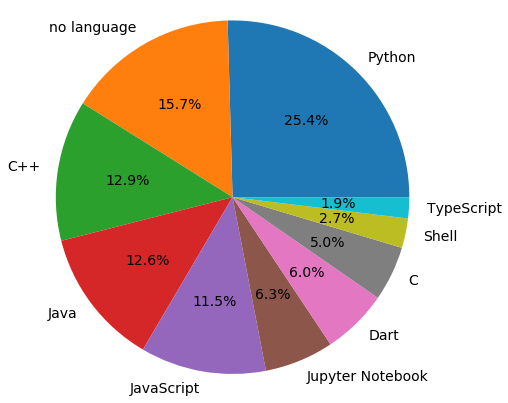

In [12]:
my_data = data['most_used_lang'].value_counts(dropna=False).head(10).values
my_labels = data['most_used_lang'].value_counts(dropna=False).head(10).index

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(my_data, labels=my_labels, autopct='%1.1f%%', textprops={'fontsize': 14})
ax1.axis('equal')
plt.show()

In the above, we can see that `Python` is the most used language in the popular repositories. And on seeing the second popular category we can say that repositories which contains some resources and useful information are popular on GitHub.

Let's see the `tag` column.

In [13]:
data['tags'].value_counts().head()

[]                                                                                                                                                                                                                                                                                        496
['polyglot', 'vm', 'java', 'javascript', 'python', 'r', 'ruby', 'c']                                                                                                                                                                                                                        3
['ray', 'distributed', 'parallel', 'machine-learning', 'reinforcement-learning', 'deep-learning', 'python', 'rllib', 'hyperparameter-search', 'optimization', 'data-science', 'automl', 'hyperparameter-optimization', 'model-selection', 'java']                                           3
['cognitive-toolkit', 'cntk', 'deep-learning', 'machine-learning', 'deep-neural-networks', 'neural-network', 'distributed', 'python', 'c-plus-

We can see that approx 500 repositories does not have any tag. Let's see the most used tag 😃.

In [14]:
# Store all tags in the `store_tag` dictionary with its frequency.
store_tag = dict()
for idx, each in data['tags'].iteritems():
    tags = each.strip('][').split(', ')
    for tag in tags:
        if tag in store_tag:
            store_tag[tag] += 1
        else:
            store_tag[tag] = 1

In [15]:
list(store_tag.items())[:10]

[("'deep-learning'", 214),
 ("'tensorflow'", 92),
 ("'neural-networks'", 23),
 ("'machine-learning'", 236),
 ("'data-science'", 110),
 ("'python'", 149),
 ("'statistics'", 16),
 ("'data-analysis'", 17),
 ("'scikit-learn'", 24),
 ("'numpy'", 8)]

In [16]:
[tag[1] for tag in list(store_tag.items())[:10]]

[214, 92, 23, 236, 110, 149, 16, 17, 24, 8]

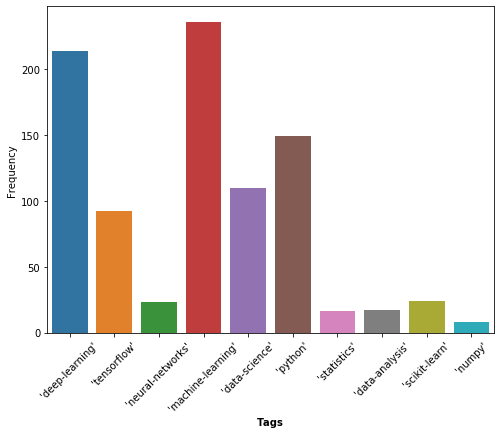

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
top_10_tag = [tag[0] for tag in list(store_tag.items())[:10]]
freq = [tag[1] for tag in list(store_tag.items())[:10]]

sns.barplot(x=top_10_tag, y=freq, ax=ax)
ax.set_xlabel('Tags', fontweight ='bold')
ax.set_ylabel('Frequency')
plt.xticks(rotation=45)
plt.show();

Above we can see that `machine-learning` is the most used tag in the popular repositories then `deep-learning` and then `python`. All comes under the data science skills.